In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the loss function
def quadratic_loss(x, y):
    return x**2 + 10 * y**2

In [3]:
# Gradient of loss function
def quadratic_grad(x, y):
    dx = 2 * x
    dy = 20 * y
    return np.array([dx, dy])

In [4]:
# BGD
def batch_gradient_descent(grad_func, eta, epochs, start_point):
    x, y = start_point
    path = [(x, y)]
    losses = [quadratic_loss(x, y)]
    
    for _ in range(epochs):
        grad = grad_func(x, y)
        x -= eta * grad[0]
        y -= eta * grad[1]
        path.append((x, y))
        losses.append(quadratic_loss(x, y))
    
    return np.array(path), losses

In [5]:
# Adam optimizer
def adam_optimizer(grad_func, eta, beta1, beta2, epsilon, epochs, start_point):
    x, y = start_point
    m = np.array([0.0, 0.0])    # First moment (momentum)
    v = np.array([0.0, 0.0])    # Second moment (RMSprop)
    path = [(x, y)]
    losses = [quadratic_loss(x, y)]
    
    for t in range(1, epochs + 1):
        grad = grad_func(x, y)  # Compute gradients
        
        # Update biased first moment estimate
        m = beta1 * m + (1 - beta1) * grad
        
        # Update biased second moment estimate
        v = beta2 * v + (1 - beta2) * (grad**2)
        
        # Bias correction
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        
        # Update parameters
        x -= eta * m_hat[0] / (np.sqrt(v_hat[0]) + epsilon)
        y -= eta * m_hat[1] / (np.sqrt(v_hat[1]) + epsilon)
        
        path.append((x, y))
        losses.append(quadratic_loss(x, y))
        
    return np.array(path), losses

In [6]:
# Visualizing the paths
def plot_paths(function, paths, labels, title):
    X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
    Z = function(X, Y)
    
    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=50, cmap='jet')
    
    for path, label in zip(paths, labels):
        plt.plot(path[:, 0], path[:, 1], label=label)
        plt.scatter(path[0, 0], path[0, 1], color='green', label='Start')
        plt.scatter(path[-1, 0], path[-1, 1], color='red', label='End')
    
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

In [7]:
# Visualization function for losses
def plot_losses(losses, labels, title):
    plt.figure(figsize=(8, 6))
    
    for loss, label in zip(losses, labels):
        plt.plot(loss, label=label)
    
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [8]:
# params
eta_gd = 0.1    # Learning rate for GD
eta_adam = 0.1  # Learning rate for Adam
beta1 = 0.9     # Beta1 for Adam
beta2 = 0.999   # Beta2 for Adam
epsilon = 1e-8  # Small constant for Adam
epochs = 100
start_point = (1.5, 1.5)    # initial point far from the minimum

In [9]:
path_gd, losses_gd = batch_gradient_descent(quadratic_grad, eta_gd, epochs, start_point)
path_adam, losses_adam = adam_optimizer(quadratic_grad, eta_adam, beta1, beta2, epsilon, epochs, start_point)

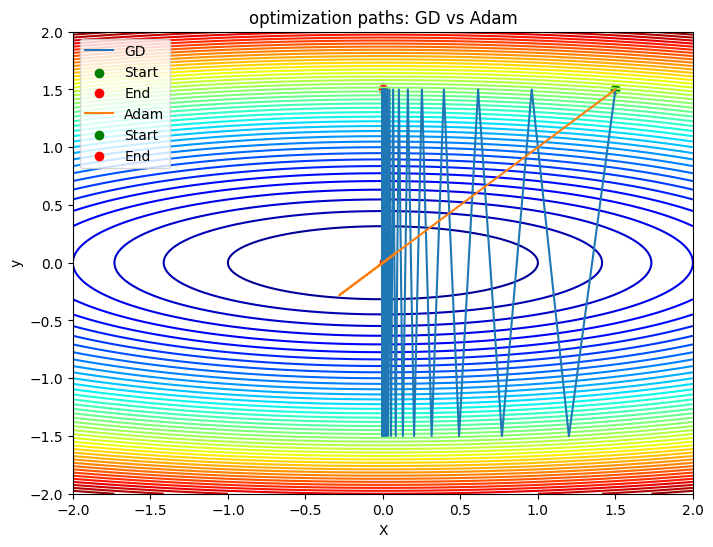

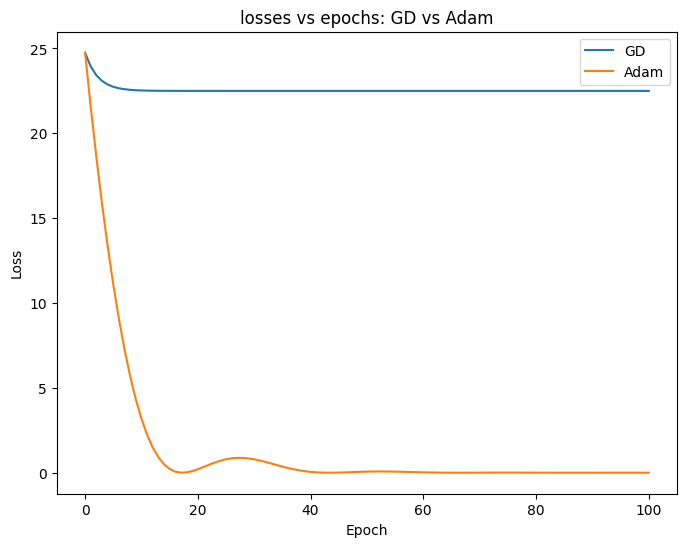

In [10]:
# Plot results
plot_paths(quadratic_loss, [path_gd, path_adam], ["GD", "Adam"], "optimization paths: GD vs Adam")
plot_losses([losses_gd, losses_adam], ["GD", "Adam"], "losses vs epochs: GD vs Adam")

### Adam vs momentum

In [13]:
# GD with momentum
def gradient_descent_momentum(grad_func, eta, beta, epochs, start_point):
    x, y = start_point
    v = np.array([0, 0])
    path = [(x, y)]
    losses = [quadratic_loss(x, y)]
    
    for _ in range(epochs):
        grad = grad_func(x, y)
        v = beta * v + (1 - beta) * grad
        x -= eta * v[0]
        y -= eta * v[1]
        path.append((x, y))
        losses.append(quadratic_loss(x, y))
        
    return np.array(path), losses

In [14]:
# Params
eta_momentum = 0.1  # Learning rate for momentum
beta_momentum = 0.9  # Momentum coeff

In [15]:
path_momentum, losses_momentum = gradient_descent_momentum(quadratic_grad, eta_momentum, beta_momentum, epochs, start_point)

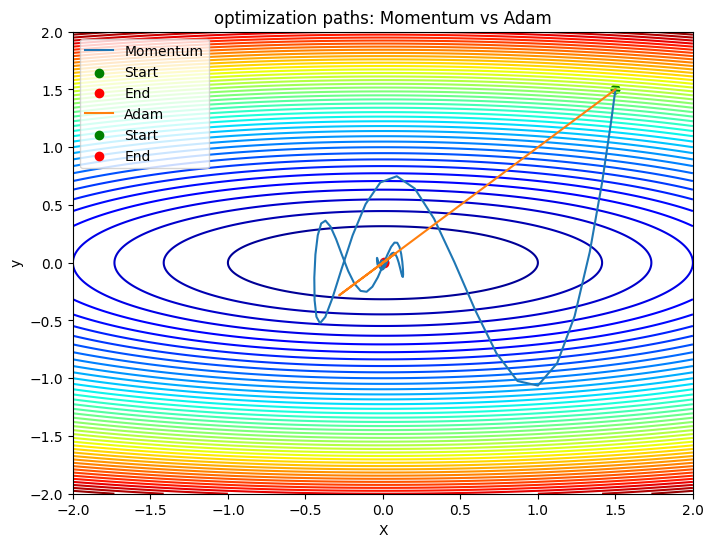

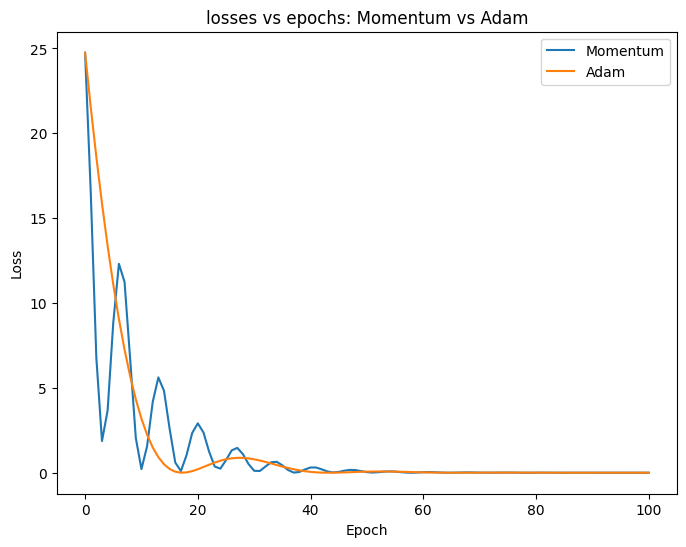

In [16]:
# Plot results
plot_paths(quadratic_loss, [path_momentum, path_adam], ["Momentum", "Adam"], "optimization paths: Momentum vs Adam")
plot_losses([losses_momentum, losses_adam], ["Momentum", "Adam"], "losses vs epochs: Momentum vs Adam")

In [17]:
### Suppression of oscillations